In [421]:
!wget "https://raw.githubusercontent.com/wshuyi/demo-customer-churn-ann/master/customer_churn.csv"

--2019-04-22 20:43:13--  https://raw.githubusercontent.com/wshuyi/demo-customer-churn-ann/master/customer_churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684858 (669K) [text/plain]
Saving to: ‘customer_churn.csv.4’

customer_churn.csv. 100%[===================>] 668.81K  --.-KB/s    in 0.05s   

2019-04-22 20:43:13 (12.4 MB/s) - ‘customer_churn.csv.4’ saved [684858/684858]



In [0]:
import pandas as pd
df=pd.read_csv('customer_churn.csv')

In [479]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [481]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [0]:
import numpy as np

In [483]:
len(df)

10000

In [484]:
df['Exited'].sum()

2037

In [485]:
len(df[df['Exited'] == 1])

2037

In [486]:
len(df[df['Exited'] == 0])

7963

In [487]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

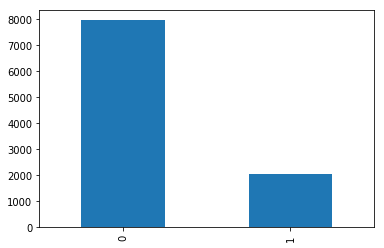

In [488]:
df['Exited'].value_counts().plot(kind='bar')

### Since we have unequal samples for Exited 0 and Exited 1 the model results in a Dummy one with same values for accuracy and loss for every Epoch. So, in order to correct it, we sample the dataframe with equal number of samples for Exited 0 and Exited 1

In [489]:
count_class_0, count_class_1 = df.Exited.value_counts()
count_class_0

7963

In [0]:
dfe0=df[df['Exited'] == 0]

In [0]:
dfe1=df[df['Exited'] == 1]

In [492]:
dfe0.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [493]:
dfe1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [0]:
exit1count=len(dfe1)

In [495]:
dfe0samp=dfe0.sample(n=exit1count)
len(dfe0samp)

2037

In [496]:
dfe0samp.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6798,6799,15799925,Uwakwe,800,France,Male,60,6,88541.57,2,1,1,131718.12,0
7904,7905,15783338,Williams,449,Spain,Male,32,0,155619.36,1,1,1,166692.03,0
8063,8064,15663888,Connor,549,Germany,Male,34,6,204017.40,2,1,0,109538.35,0
4522,4523,15705309,Yuriev,629,Spain,Male,39,5,0.00,2,0,0,116748.14,0
8677,8678,15757829,Timperley,609,Germany,Female,40,10,137389.77,2,1,0,170122.22,0


In [497]:
unisamp=dfe0samp.append(dfe1, ignore_index=True)
unisamp.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,6799,15799925,Uwakwe,800,France,Male,60,6,88541.57,2,1,1,131718.12,0
1,7905,15783338,Williams,449,Spain,Male,32,0,155619.36,1,1,1,166692.03,0
2,8064,15663888,Connor,549,Germany,Male,34,6,204017.40,2,1,0,109538.35,0
3,4523,15705309,Yuriev,629,Spain,Male,39,5,0.00,2,0,0,116748.14,0
4,8678,15757829,Timperley,609,Germany,Female,40,10,137389.77,2,1,0,170122.22,0


In [498]:
unisamp.drop(['RowNumber'], axis=1, inplace=True)
unisamp.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15799925,Uwakwe,800,France,Male,60,6,88541.57,2,1,1,131718.12,0
1,15783338,Williams,449,Spain,Male,32,0,155619.36,1,1,1,166692.03,0
2,15663888,Connor,549,Germany,Male,34,6,204017.40,2,1,0,109538.35,0
3,15705309,Yuriev,629,Spain,Male,39,5,0.00,2,0,0,116748.14,0
4,15757829,Timperley,609,Germany,Female,40,10,137389.77,2,1,0,170122.22,0


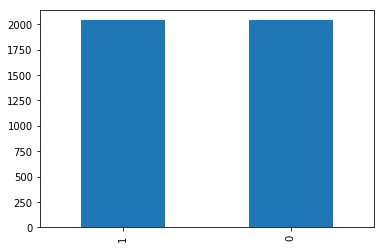

In [499]:
unisamp['Exited'].value_counts().plot(kind='bar')

In [0]:
!pip install -q tensorflow==2.0.0-alpha0

In [0]:
import tensorflow as tf
from tensorflow import keras

In [502]:
df=unisamp
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15799925,Uwakwe,800,France,Male,60,6,88541.57,2,1,1,131718.12,0
1,15783338,Williams,449,Spain,Male,32,0,155619.36,1,1,1,166692.03,0
2,15663888,Connor,549,Germany,Male,34,6,204017.40,2,1,0,109538.35,0
3,15705309,Yuriev,629,Spain,Male,39,5,0.00,2,0,0,116748.14,0
4,15757829,Timperley,609,Germany,Female,40,10,137389.77,2,1,0,170122.22,0


### Since we have various fields with different scales, machine might not be able to find the true relationship between them (Eg: Salary >> Age, Salary >>> Tenure), which results in a faulty model. So we convert them all onto a common scale using the Standard Scaler as below:

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[numeric_columns] = sc.fit_transform(df[numeric_columns])

In [504]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15799925,Uwakwe,1.513154,France,Male,1.791765,0.337355,0.103465,0.728644,1,1,0.547449,0
1,15783338,Williams,-2.044557,Spain,Male,-0.864482,-1.709384,1.198875,-0.759324,1,1,1.157086,0
2,15663888,Connor,-1.030964,Germany,Male,-0.674750,0.337355,1.989237,0.728644,1,0,0.160829,0
3,15705309,Yuriev,-0.220089,Spain,Male,-0.200420,-0.003768,-1.342459,0.728644,0,0,0.286504,0
4,15757829,Timperley,-0.422808,Germany,Female,-0.105554,1.701848,0.901178,0.728644,1,0,1.216878,0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train, test = train_test_split(df, test_size = 0.2, random_state = 1)

In [507]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3985,15775192,Rounsevell,0.823911,Germany,Female,0.653374,-0.344891,0.338967,-0.759324,1,0,0.358054,1
829,15797197,Macleod,0.276571,Spain,Male,-1.149080,0.337355,-1.342459,0.728644,1,0,-0.625224,0
546,15739194,Manfrin,-1.041100,Spain,Male,-0.295286,-1.709384,1.565285,0.728644,1,0,-1.078593,0
1401,15813640,Shih,-0.088322,France,Female,-0.105554,0.678479,-1.342459,0.728644,1,0,-1.561819,0
2779,15653251,Hickey,-2.460130,France,Female,4.068548,1.019602,0.092553,-0.759324,0,0,1.536955,1


In [508]:
len(train)

3259

In [509]:
len(test)

815

In [0]:
train, valid = train_test_split(train, test_size=0.2, random_state=1)

In [511]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1416,15726234,Trentini,0.580649,Spain,Female,-0.010688,-0.003768,-1.342459,-0.759324,0,1,0.988212,0
609,15632272,Lung,1.432067,France,Female,0.084178,-1.027138,-1.342459,0.728644,1,0,-0.133310,0
2100,15590241,Chuang,1.006358,Spain,Female,-0.674750,1.360725,0.499979,-0.759324,0,0,0.873123,1
1476,15790594,Bednall,-1.172867,France,Female,-1.338812,0.337355,-1.342459,0.728644,0,1,-0.880908,0
3348,15687421,Highland,-0.929604,Spain,Male,2.455827,1.360725,0.713861,-0.759324,1,0,1.317783,1


In [512]:
valid.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3683,15772482,Iloerika,1.807096,Germany,Male,-1.243946,-0.686014,0.819783,2.216613,1,0,0.079789,1
2112,15661629,Ricci,-1.304634,Spain,Male,-0.674750,1.360725,0.722303,-0.759324,1,0,1.288805,1
3746,15777060,Olszewski,1.209076,France,Female,-0.769616,-0.344891,-1.342459,-0.759324,1,0,-1.293941,1
619,15729362,Lombardi,0.955678,France,Male,-0.485018,1.019602,-0.244622,-0.759324,1,0,0.531264,0
618,15810942,Chiemela,-2.085100,Germany,Female,1.886631,-1.027138,0.905514,-0.759324,0,1,-1.227192,0


In [513]:
test.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3154,15724076,Christie,1.665193,Spain,Female,1.507167,-0.003768,-1.342459,2.216613,0,0,-1.069760,1
846,15617134,Iqbal,0.661736,France,Male,-0.295286,-0.344891,-1.342459,0.728644,1,0,1.557771,0
3335,15620756,Stokes,0.975950,France,Male,0.748240,0.337355,1.971065,-0.759324,1,1,-1.447019,1
3116,15587174,Kerr,0.763096,France,Male,-1.149080,0.678479,-1.342459,0.728644,1,1,-0.147603,1
1644,15661007,Thompson,0.094124,France,Male,-0.769616,-1.709384,-0.153873,-0.759324,0,0,1.407397,0


In [514]:
len(valid)

652

In [515]:
len(train)

2607

In [0]:
from tensorflow import feature_column

In [0]:
tf.random.set_seed(1)

In [0]:
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_columns = ['Geography',
       'Gender', 'HasCrCard',
       'IsActiveMember']

In [0]:
feature_columns=[]

In [0]:
for header in numeric_columns:
  feature_columns.append(feature_column.numeric_column(header))

In [521]:
feature_columns

[NumericColumn(key='CreditScore', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Tenure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Balance', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='NumOfProducts', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='EstimatedSalary', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [0]:
def get_one_hot_rom_categorical(colname):
  categorical = feature_column.categorical_column_with_vocabulary_list(
  colname,
  train[colname].unique().tolist())
  return feature_column.indicator_column(categorical)

In [523]:
get_one_hot_rom_categorical("Geography")

IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Geography', vocabulary_list=('Spain', 'France', 'Germany'), dtype=tf.string, default_value=-1, num_oov_buckets=0))

In [0]:
for col in categorical_columns:
  feature_columns.append(get_one_hot_rom_categorical(col))

In [525]:
feature_columns

[NumericColumn(key='CreditScore', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Tenure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Balance', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='NumOfProducts', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='EstimatedSalary', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Geography', vocabulary_list=('Spain', 'France', 'Germany'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Gender', vocabulary_list=('Female', 'Male'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(c

In [0]:
from tensorflow.keras import layers

In [0]:
feature_layer = layers.DenseFeatures(feature_columns)

In [528]:
feature_layer

In [0]:
model = keras.Sequential()
model.add(feature_layer)
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [0]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [0]:
def df_to_tfdata(df, shuffle=True, bs=32):
  df = df.copy()
  labels = df.pop('Exited')
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(df), seed=1)
  ds = ds.batch(bs)
  return ds

In [0]:
train_ds=df_to_tfdata(train)

In [0]:
valid_ds = df_to_tfdata(valid, shuffle=False)
test_ds = df_to_tfdata(test, shuffle=False)

## Before sampling and applying standard scaler result:

#### Resulted in Dummy Model

In [420]:

model.fit(train_ds,
         validation_data = valid_ds,
         epochs=5)

Epoch 1/5
82/82 [==============================] - 2s 22ms/step - loss: 7.6882 - accuracy: 0.4994 - val_loss: 7.5754 - val_accuracy: 0.4985
Epoch 2/5
82/82 [==============================] - 2s 19ms/step - loss: 7.6882 - accuracy: 0.4994 - val_loss: 7.5754 - val_accuracy: 0.4985
Epoch 3/5
82/82 [==============================] - 2s 19ms/step - loss: 7.6882 - accuracy: 0.4994 - val_loss: 7.5754 - val_accuracy: 0.4985
Epoch 4/5
82/82 [==============================] - 2s 20ms/step - loss: 7.6882 - accuracy: 0.4994 - val_loss: 7.5754 - val_accuracy: 0.4985
Epoch 5/5
82/82 [==============================] - 2s 19ms/step - loss: 7.6882 - accuracy: 0.4994 - val_loss: 7.5754 - val_accuracy: 0.4985


## After sampling and applying standard scaler result:

In [534]:
model.fit(train_ds,
         validation_data = valid_ds,
         epochs=5)

Epoch 1/5
82/82 [==============================] - 2s 22ms/step - loss: 0.5800 - accuracy: 0.6613 - val_loss: 0.4997 - val_accuracy: 0.7684
Epoch 2/5
82/82 [==============================] - 2s 20ms/step - loss: 0.5045 - accuracy: 0.7500 - val_loss: 0.4590 - val_accuracy: 0.7776
Epoch 3/5
82/82 [==============================] - 2s 19ms/step - loss: 0.4725 - accuracy: 0.7598 - val_loss: 0.4486 - val_accuracy: 0.7745
Epoch 4/5
82/82 [==============================] - 2s 20ms/step - loss: 0.4595 - accuracy: 0.7678 - val_loss: 0.4465 - val_accuracy: 0.7791
Epoch 5/5
82/82 [==============================] - 2s 19ms/step - loss: 0.4509 - accuracy: 0.7673 - val_loss: 0.4460 - val_accuracy: 0.7853


In [535]:
model.evaluate(test_ds)

26/26 [==============================] - 0s 13ms/step - loss: 0.4637 - accuracy: 0.7853


[0.4637184211840996, 0.78527606]